# Classify Song Genres from Audio Data

# Project Description

Using a dataset comprised of songs of two music genres (Hip-Hop and Rock), you will train a classifier to distinguish between the two genres based only on track information derived from Echonest (now part of Spotify)

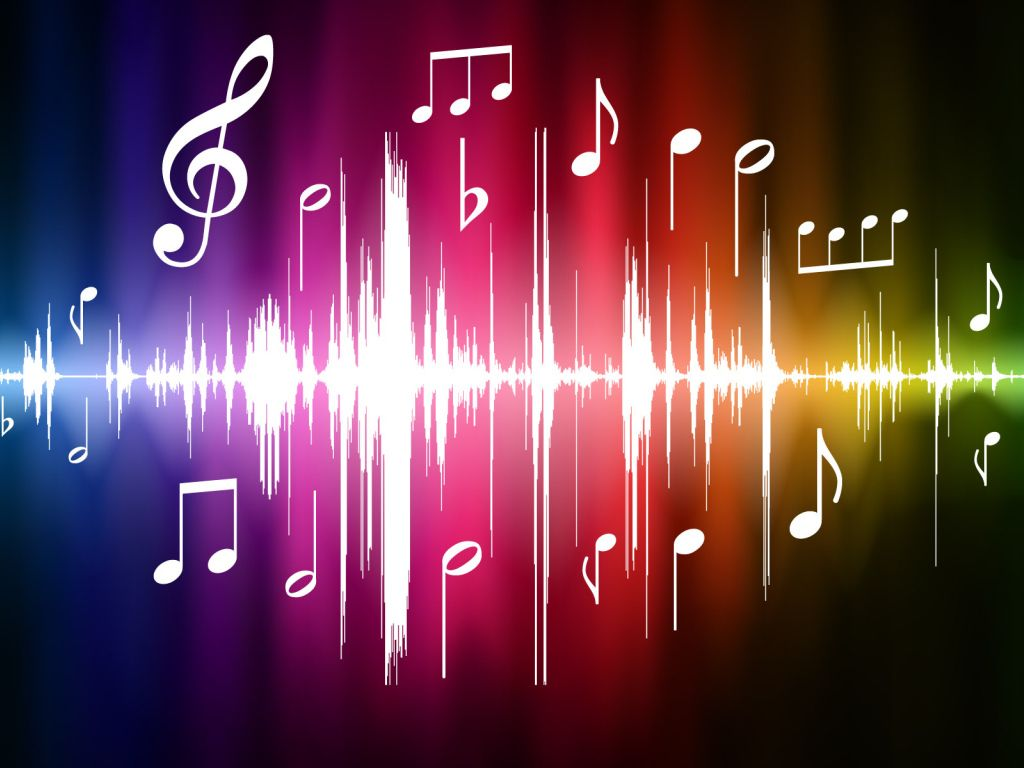

#  Preparing our dataset

In [1]:
#import basic and required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Read the dataset fma-rock-vs-hiphop.csv with variable fma_rock_vs_hiphop_data
fma_rock_vs_hiphop_data = pd.read_csv('../input/fma-rock-vs-hiphop.csv')
fma_rock_vs_hiphop_data.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [6]:
fma_rock_vs_hiphop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17734 entries, 0 to 17733
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   track_id       17734 non-null  int64 
 1   bit_rate       17734 non-null  int64 
 2   comments       17734 non-null  int64 
 3   composer       166 non-null    object
 4   date_created   17734 non-null  object
 5   date_recorded  1898 non-null   object
 6   duration       17734 non-null  int64 
 7   favorites      17734 non-null  int64 
 8   genre_top      17734 non-null  object
 9   genres         17734 non-null  object
 10  genres_all     17734 non-null  object
 11  information    482 non-null    object
 12  interest       17734 non-null  int64 
 13  language_code  4089 non-null   object
 14  license        17714 non-null  object
 15  listens        17734 non-null  int64 
 16  lyricist       53 non-null     object
 17  number         17734 non-null  int64 
 18  publisher      52 non-null

In [7]:
# Read the dataset echonest-metrics.json with variable echonest_metrics.
echonest_metrics = pd.read_json('../input/echonest-metrics.json',precise_float = True)
echonest_metrics.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [8]:
echonest_metrics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 0 to 13128
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          13129 non-null  int64  
 1   acousticness      13129 non-null  float64
 2   danceability      13129 non-null  float64
 3   energy            13129 non-null  float64
 4   instrumentalness  13129 non-null  float64
 5   liveness          13129 non-null  float64
 6   speechiness       13129 non-null  float64
 7   tempo             13129 non-null  float64
 8   valence           13129 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 1.0 MB


In [9]:
# Merge the track_id ,genre_top,bit_rate and duration columns of fma_rock_vs_hiphop_data and echonest_metrics on track_id values
fma_echo_data= pd.merge(left = fma_rock_vs_hiphop_data[['track_id', 'genre_top','bit_rate','duration']], right=echonest_metrics, on='track_id')
fma_echo_data.head()

,track_id,genre_top,bit_rate,duration,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,153,Rock,256000,405,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018
1,154,Rock,256000,319,0.970135,0.352946,0.023852,0.957113,0.113261,0.032177,53.758,0.035632
2,155,Rock,192000,756,0.981657,0.142249,0.912122,0.967294,0.363510,0.087527,91.912,0.034325
3,169,Rock,192000,144,0.989141,0.225978,0.722835,0.263076,0.092371,0.053406,94.322,0.028347
4,170,Rock,192000,181,0.886660,0.298518,0.744333,0.920950,0.139587,0.088781,97.880,0.073548


In [10]:
fma_echo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   genre_top         4802 non-null   object 
 2   bit_rate          4802 non-null   int64  
 3   duration          4802 non-null   int64  
 4   acousticness      4802 non-null   float64
 5   danceability      4802 non-null   float64
 6   energy            4802 non-null   float64
 7   instrumentalness  4802 non-null   float64
 8   liveness          4802 non-null   float64
 9   speechiness       4802 non-null   float64
 10  tempo             4802 non-null   float64
 11  valence           4802 non-null   float64
dtypes: float64(8), int64(3), object(1)
memory usage: 487.7+ KB


# Pairwise relationships between continuous variables

We typically want to avoid using variables that have strong correlations with each other -- hence avoiding feature redundancy -- for a few reasons:

To keep the model simple and improve interpretability (with many features, we run the risk of overfitting).
When our datasets are very large, using fewer features can drastically speed up our computation time.

In [11]:
# Create a pairwise relationship between continuous variables.
corr = fma_echo_data.corr()
corr.style.background_gradient()

,track_id,bit_rate,duration,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,1.000000,0.051642,-0.016075,-0.372282,0.049454,0.140703,-0.275623,0.048231,-0.026995,-0.025392,0.010070
bit_rate,0.051642,1.000000,0.051096,-0.012801,0.016274,-0.122050,-0.013962,0.010586,-0.012015,-0.010813,0.009306
duration,-0.016075,0.051096,1.000000,0.044348,-0.135483,-0.113990,0.019816,0.028325,-0.018792,-0.021827,-0.205468
acousticness,-0.372282,-0.012801,0.044348,1.000000,-0.028954,-0.281619,0.194780,-0.019991,0.072204,-0.026310,-0.013841
danceability,0.049454,0.016274,-0.135483,-0.028954,1.000000,-0.242032,-0.255217,-0.106584,0.276206,-0.242089,0.473165
energy,0.140703,-0.122050,-0.113990,-0.281619,-0.242032,1.000000,0.028238,0.113331,-0.109983,0.195227,0.038603
instrumentalness,-0.275623,-0.013962,0.019816,0.194780,-0.255217,0.028238,1.000000,-0.091022,-0.366762,0.022215,-0.219967
liveness,0.048231,0.010586,0.028325,-0.019991,-0.106584,0.113331,-0.091022,1.000000,0.041173,0.002732,-0.045093
speechiness,-0.026995,-0.012015,-0.018792,0.072204,0.276206,-0.109983,-0.366762,0.041173,1.000000,0.008241,0.149894
tempo,-0.025392,-0.010813,-0.021827,-0.026310,-0.242089,0.195227,0.022215,0.002732,0.008241,1.000000,0.052221


In the above metrix there is highest corelation between valence and danceability it's 0.473165.
but it's not strong  enough.

# Normalizing the feature data

In [12]:
# Define our features 
feature = fma_echo_data.drop(['genre_top', 'track_id'], axis = 1)
feature

,bit_rate,duration,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,256000,405,0.988306,0.255661,0.979774,9.730057e-01,0.121342,0.051740,90.241,0.034018
1,256000,319,0.970135,0.352946,0.023852,9.571129e-01,0.113261,0.032177,53.758,0.035632
2,192000,756,0.981657,0.142249,0.912122,9.672940e-01,0.363510,0.087527,91.912,0.034325
3,192000,144,0.989141,0.225978,0.722835,2.630763e-01,0.092371,0.053406,94.322,0.028347
4,192000,181,0.886660,0.298518,0.744333,9.209505e-01,0.139587,0.088781,97.880,0.073548
...,...,...,...,...,...,...,...,...,...,...
4797,224206,202,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,217951,201,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,199442,181,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,235940,140,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


In [13]:
# Define our labels
label = fma_echo_data['genre_top']
label.value_counts()

Rock       3892
Hip-Hop     910
Name: genre_top, dtype: int64

In [14]:
# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Scale the features and set the values to a variable
scaler = StandardScaler()
scaled_train_feat = scaler.fit_transform(feature)

In [15]:
np.mean(scaled_train_feat),np.std(scaled_train_feat)

(8.759710528321102e-17, 0.9999999999999999)

# Train a decision tree to classify genre

example:-
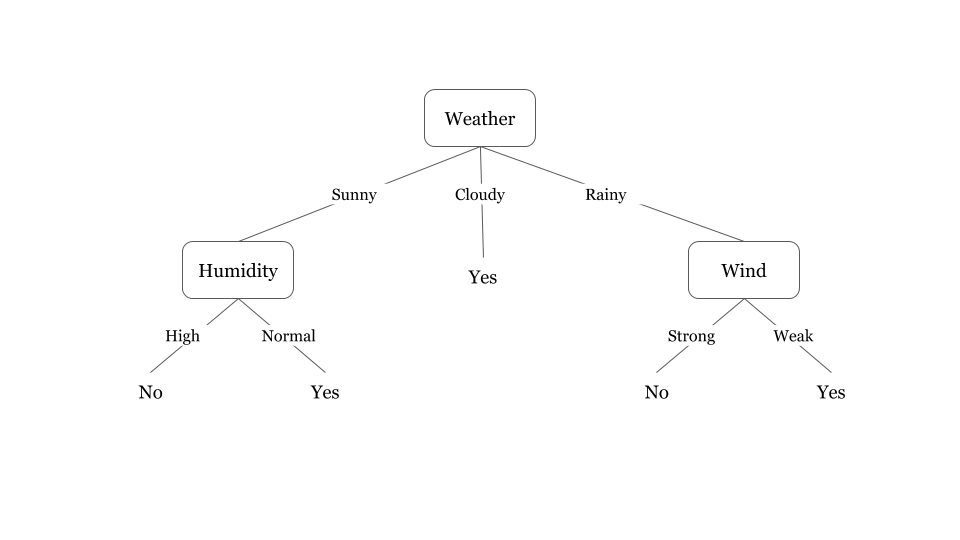

In [17]:
# Import train_test_split function and Decision tree classifier
from sklearn.model_selection import train_test_split

# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(scaled_train_feat, label,random_state=35, stratify = label)

# Train our decision tree
from sklearn.tree import DecisionTreeClassifier
d_tree = DecisionTreeClassifier(random_state = 10)
d_tree.fit(train_features, train_labels)

# Predict the labels for the test data
pred_label_tree = d_tree.predict(test_features)

In [18]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, pred_label_tree)

0.8934221482098251

<AxesSubplot:>

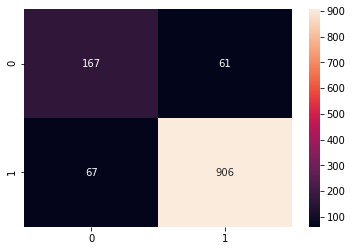

In [19]:
#Confusion matrix visulization.
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_labels, pred_label_tree)
sns.heatmap(cm,annot=True,fmt='d')

# LogisticRegression

In [20]:
# Import LogisticRegression`
from sklearn.linear_model import LogisticRegression

# Train our logistic regression and predict labels for the test set
lr = LogisticRegression(random_state = 10)
lr.fit(train_features, train_labels)
pred_label_logit = lr.predict(test_features)

In [21]:
# Create the classification report for both models

from sklearn.metrics import classification_report
class_rep_d_tree = classification_report(test_labels, pred_label_tree)
class_rep_log = classification_report(test_labels, pred_label_logit)

print("Decision Tree:", class_rep_d_tree)
print("Logistic Regression:", class_rep_log)

Decision Tree:               precision    recall  f1-score   support

     Hip-Hop       0.71      0.73      0.72       228
        Rock       0.94      0.93      0.93       973

    accuracy                           0.89      1201
   macro avg       0.83      0.83      0.83      1201
weighted avg       0.89      0.89      0.89      1201

Logistic Regression:               precision    recall  f1-score   support

     Hip-Hop       0.81      0.59      0.68       228
        Rock       0.91      0.97      0.94       973

    accuracy                           0.90      1201
   macro avg       0.86      0.78      0.81      1201
weighted avg       0.89      0.90      0.89      1201



Here we can see logistic Regression gives slightly good accuracy compare to the Decision Tree.

# cross-validation Model

In [22]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,cross_val_predict

# Set up our K-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=10)

decision_tree = DecisionTreeClassifier(random_state=10)
logistic_reg = LogisticRegression(random_state=10)

# Train our models using KFold cv
dtree_score = cross_val_score(decision_tree, scaled_train_feat, label, cv = kf,scoring='roc_auc')
lr_score = cross_val_score(logistic_reg, scaled_train_feat, label, cv = kf,scoring='roc_auc')

# Print the mean of each array of scores
print("Decision Tree:", np.mean(dtree_score),"Logistic Regression:", np.mean(lr_score))

Decision Tree: 0.79717529685396 Logistic Regression: 0.9022409223496822


As this is a biased dataset therefore we can not use Accuracy but will have to go with ROC-AUC

# Now Appling Ensemble methods

In [41]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier

kf = StratifiedKFold(n_splits=10, random_state=10)

rf,et,gb = RandomForestClassifier(),ExtraTreesClassifier(),GradientBoostingClassifier()
for i in (rf,et,gb):
    score = cross_val_score(i, scaled_train_feat, label, cv = kf,scoring='accuracy')
    print((i.__class__.__name__,(np.mean(score)),(np.std(score))))

('RandomForestClassifier', 0.9264964483714484, 0.0176543206201918)
('ExtraTreesClassifier', 0.9254534823284823, 0.01939099497781041)
('GradientBoostingClassifier', 0.9300381150381151, 0.01953686555722264)


This data is not balanced so roc_auc is good parameter comapre to accuracy so the above cell shows the value of roc_auc

# Applying  Principal Component Analysis on our scaled data

In [24]:
# Import plotting module and PCA class
from sklearn.decomposition import PCA

# Get our explained variance ratios from PCA using all features
pca = PCA()
pca.fit(scaled_train_feat)
exp_var = pca.explained_variance_ratio_

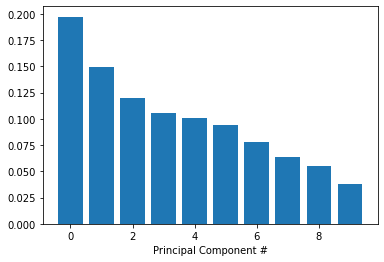

In [25]:
# plot the explained variance using a barplot
fig, ax = plt.subplots()
ax.bar(range(pca.n_components_),exp_var)
ax.set_xlabel('Principal Component #')
plt.show()

# Further visualization of PCA

In [26]:
# Now find the cumulative explained variance
cum_exp_var = np.cumsum(exp_var)
cum_exp_var

array([0.19722586, 0.34642446, 0.46584368, 0.57110437, 0.67142729,
       0.765523  , 0.84359648, 0.90697309, 0.96230099, 1.        ])

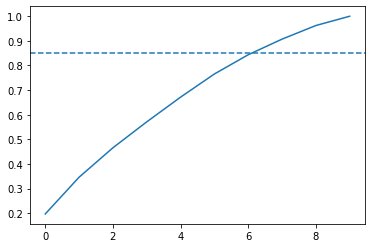

In [27]:
# Plot the cumulative explained variance and draw a dashed line at 0.85.
fig, ax = plt.subplots()
ax.plot(range(10),cum_exp_var)
ax.axhline(y=0.85, linestyle='--')
plt.show()

In [28]:
n_components = 9

# Perform PCA with the chosen number of components and project data onto components
pca = PCA(n_components, random_state=10)
pca.fit(scaled_train_feat)
pca_projection = pca.transform(scaled_train_feat)

# Decision tree Model (with PCA )

In [29]:
# Split our data
train_features, test_features, train_labels, test_labels = train_test_split(pca_projection, label,random_state=35, stratify = label)

# Train our decision tree
d_tree.fit(train_features, train_labels)

# Predict the labels for the test data
pca_pred_label_tree = d_tree.predict(test_features)

In [30]:
accuracy_score(test_labels, pca_pred_label_tree)

0.880932556203164

<AxesSubplot:>

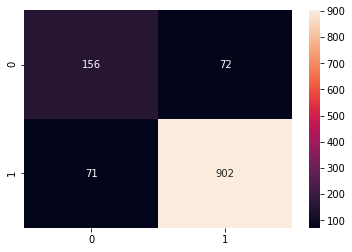

In [31]:
#confusion matrix with visulization
pca_cm=confusion_matrix(test_labels, pca_pred_label_tree)
sns.heatmap(pca_cm,annot=True,fmt='d')

# Logistic Regression (with PCA )

In [32]:
#logistcRegression
pca_lr = LogisticRegression(random_state = 10)
pca_lr.fit(train_features, train_labels)
pca_pred_label_logit = pca_lr.predict(test_features)

In [33]:
# Create the classification report for both models

pca_class_rep_tree = classification_report(test_labels, pca_pred_label_tree)
pca_class_rep_log = classification_report(test_labels, pca_pred_label_logit)

print("Decision Tree:", pca_class_rep_tree)
print("Logistic Regression:", pca_class_rep_log)

Decision Tree:               precision    recall  f1-score   support

     Hip-Hop       0.69      0.68      0.69       228
        Rock       0.93      0.93      0.93       973

    accuracy                           0.88      1201
   macro avg       0.81      0.81      0.81      1201
weighted avg       0.88      0.88      0.88      1201

Logistic Regression:               precision    recall  f1-score   support

     Hip-Hop       0.82      0.59      0.69       228
        Rock       0.91      0.97      0.94       973

    accuracy                           0.90      1201
   macro avg       0.86      0.78      0.81      1201
weighted avg       0.89      0.90      0.89      1201



Here we can see logistic Regression gives slightly good accuracy compare to the Decision Tree.

# Balance our dataset

In [34]:
# Subset only the hip-hop tracks, and then only the rock tracks
hip_hop_only = fma_echo_data.loc[fma_echo_data['genre_top'] == 'Hip-Hop']
rock_only = fma_echo_data.loc[fma_echo_data['genre_top'] == 'Rock']
rock_only.shape, hip_hop_only.shape

((3892, 12), (910, 12))

In [35]:
# sample the rocks songs to be the same number as there are hip-hop songs
rock_only = rock_only.sample(n= hip_hop_only.shape[0])
rock_only.shape, hip_hop_only.shape

((910, 12), (910, 12))

In [36]:
# concatenate the dataframes rock_only and hop_only
hip_hop_rock_bal = pd.concat([rock_only, hip_hop_only])
hip_hop_rock_bal

,track_id,genre_top,bit_rate,duration,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
2311,31441,Rock,235010,121,0.097332,0.313959,0.902545,9.293451e-01,0.402757,0.060522,184.027,0.855251
2193,28747,Rock,256000,140,0.237673,0.490226,0.883070,7.649894e-01,0.232237,0.041676,86.903,0.622495
1429,12399,Rock,256000,319,0.904855,0.436453,0.357576,9.080781e-01,0.081625,0.051557,202.821,0.538282
1915,20345,Rock,256000,178,0.826162,0.258092,0.779568,4.438956e-01,0.138201,0.059638,187.814,0.619112
2534,36488,Rock,320000,246,0.828325,0.218875,0.836022,8.252846e-01,0.138401,0.042534,162.003,0.642790
...,...,...,...,...,...,...,...,...,...,...,...,...
4797,124718,Hip-Hop,224206,202,0.412194,0.686825,0.849309,6.000000e-10,0.867543,0.367315,96.104,0.692414
4798,124719,Hip-Hop,217951,201,0.054973,0.617535,0.728567,7.215700e-06,0.131438,0.243130,96.262,0.399720
4799,124720,Hip-Hop,199442,181,0.010478,0.652483,0.657498,7.098000e-07,0.701523,0.229174,94.885,0.432240
4800,124721,Hip-Hop,235940,140,0.067906,0.432421,0.764508,1.625500e-06,0.104412,0.310553,171.329,0.580087


In [37]:
#define feature and label
bal_feat=hip_hop_rock_bal.drop(['track_id','genre_top'],axis=1)
bal_lable=hip_hop_rock_bal['genre_top']

In [38]:
#normalize the data
bal_scaled_train_features = scaler.fit_transform(bal_feat)

In [39]:
#cross vaidation 
from sklearn.model_selection import cross_val_score,StratifiedKFold,cross_val_predict

# Set up our K-fold cross-validation
kf = StratifiedKFold(n_splits=10, random_state=10)


# Train our models using KFold cv
bal_tree_score = cross_val_score(d_tree, bal_scaled_train_features, bal_lable, cv = kf,scoring='accuracy')
bal_logit_score = cross_val_score(lr, bal_scaled_train_features, bal_lable, cv = kf,scoring='accuracy')

# Print the mean of each array of scores
print("Decision Tree:", np.mean(bal_tree_score),"Logistic Regression:", np.mean(bal_logit_score))

Decision Tree: 0.8631868131868133 Logistic Regression: 0.8543956043956044


In [47]:
train_features, test_features, train_labels, test_labels = train_test_split(scaled_train_feat, label,random_state=35, stratify = label)

In [48]:
gbc = GradientBoostingClassifier()
gbc.fit(train_features, train_labels)

GradientBoostingClassifier()

In [49]:
gbc.score(test_features, test_labels)

0.9375520399666945

In [53]:
import pickle

filename = '../models/model_gbc.pkl'
pickle.dump(gbc, open(filename, 'wb'))


In [55]:
loaded_model = pickle.load(open(filename, 'rb'))

In [56]:
loaded_model.predict(test_features)

array(['Rock', 'Rock', 'Rock', ..., 'Rock', 'Hip-Hop', 'Rock'],
      dtype=object)